In [9]:
from hod import HOD
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
halofile = '/home/rsujatha/MEGA/taurus_to_laptop/highres-halocat.txt'
catalogheader_names = ['M200b[0]','x[1]','y[2]','z[3]','Rvir[4]','Ax[5]','Ay[6]','Az[7]','Cx[8]','Cy[9]','Cz[10]','cvir[11]','spin[12]','c_to_a[13]','b_to_a[14]']
df_dtype = [('M200b[0]','f'),('x[1]','f'),('y[2]','f'),('z[3]','f'),('Rvir[4]','f'),('Ax[5]','f'),('Ay[6]','f'),('Az[7]','f'),('Cx[8]','f'),('Cy[9]','f'),('Cz[10]','f'),('cvir[11]','f'),('spin[12]','f'),('c_to_a[13]','f'),('b_to_a[14]','f')]
tp = pd.read_csv(halofile,names=catalogheader_names,dtype=df_dtype, delim_whitespace=True,comment='#',iterator=True, chunksize=1000,usecols=['M200b[0]','cvir[11]','spin[12]','c_to_a[13]','b_to_a[14]']) 
dfhr = pd.concat(tp, ignore_index=True) 

In [3]:
m200bhr = dfhr ["M200b[0]"]
cvirhr = dfhr ["cvir[11]"]
spinhr = dfhr ["spin[12]"]
cahr = dfhr ["c_to_a[13]"]
bahr = dfhr ["b_to_a[14]"]

In [19]:
h = HOD()
logMmin = 11.95
sigmalogM = 0.65
haloproperty= np.array([cvirhr,spinhr,cahr,bahr])
prop_thresh = h.property_threshold(m200bhr,flag=1,logMmin=logMmin ,sigmalogM=sigmalogM ,haloproperty=haloproperty)
## The function prop_thresh gives for each mass bin the threshold value of each halo property w
## it takes around one min to run, but after calibration once you can set flag set to 0, it runs very fast
get_central = h.get_centrals(haloproperty,prop_thresh)
## get_central returns a boolean array which indicates those haloes that are populated

In [7]:
M = np.logspace(11.3,14.5,25)
Mgp = np.sqrt(M[1:]*M[0:-1])
Nc = h.N_central(Mgp,logMmin,sigmalogM)
Number_of_haloes,k = np.histogram(m200bhr,M)
Number_of_centrals,k = np.histogram(m200bhr[get_central],M)

Text(0, 0.5, '<N-central>')

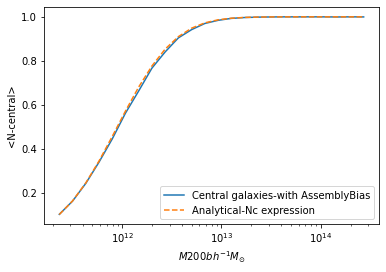

In [21]:
## plot to demonstrate that this way of incorporating Assembly bias is "HOD conserving"- minimises modification to allow for assembly bias (cite andrew hearin decorated hod:1512.03050)
plt.plot(Mgp,Number_of_centrals/Number_of_haloes,label='Central galaxies-with AssemblyBias')
plt.plot(Mgp,Nc,linestyle='dashed',label='Analytical-Nc expression')
plt.xscale('log')
plt.legend()
plt.xlabel("$M200b h^{-1}M_{\odot}$")
plt.ylabel('<N-central>')